### **DATASET OVERVIEW**

**Customer Churn Dataset** provides a detailed overview of customer behavior and the factors influencing whether a customer continues or discontinues their service subscription. 

### **Import Libraries**
- ***pandas*** is used for data manipulation and analysis.
- ***numpy*** is used for numerical computing in Python.
- ***seaborn*** is used for data visualization built on top of matplotlib.
- ***matplotlib.pyplot*** from is used to create static, interactive, and animated visualizations.
- ***sklearn.preprocessing.OneHotEncoder*** is used to convert categorical variables into a one-hot numeric array.
- ***sklearn.model_selection.train_test_split*** splits datasets into training and testing subjects.
- ***sklearn.preprocessing.RobustScaler*** is used to scale features using statistics that are robust to outliers.
- ***sklearn.linear_model.LogisticRegression*** is used to estimate the probability of a binary outcome using a logistic function.
- ***sklearn.svm.SVC*** is a library for Support Vector Machine model.
- ***sklearn.ensemble.RandomForestClassifier*** is a library for Random Forest model.
- ***sklearn.metrics.classification_report*** is a module that generates a detailed classification report.
- ***sklearn.metrics.confusion_matrix*** is used to compute the confusion matrix.
- ***sklearn.metrics.ConfusionMatrixDisplay*** is used to plot the confusion matrix.
- ***sklearn.metrics.roc_curve*** is used to compute the ROC curve.
- ***sklearn.metrics.roc_auc_score*** is used to compute the area under ROC curve.

In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

### **Read Data**
- ***pd.read_csv()*** is used to convert a csv file into a dataframe.

In [3]:
df2 = pd.read_csv("churn.csv")

### **Explore Data**
- ***df2.head()*** displays the first 5 rows of a dataframe.
- ***df2.info()*** provides informations about the dataframe, including the structures and the column details.
- ***df2.describe()*** generates descriptive statistics for the numerical columns in the dataframe.
- ***df2.drop(columns)*** removes the specified columns from a dataframe.
- ***numericals.append()*** and ***categoricals.append()*** is used to store columns into its type (categorical/numerical).

In [5]:
df2.\
    head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df2.\
    info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [7]:
df2.\
    describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


> In the code below, I remove the *customer_id* column because it is unnecessary for the modeling process we are aiming for.

In [8]:
df2.drop("customer_id", 
         axis = 1, 
         inplace = True)

> Here, I separate the numerical and categorical columns, to ease the following processes (handling missing values (if exist), and identifying outliers).

In [4]:
categoricals = []
numericals = []

for i in df2.columns :
    if ("int" in str(df2[i].dtype) or "float" in str(df2[i].dtype)) :
        numericals.append(i)
    else :
        categoricals.append(i)

print(f"Categorical Columns: {categoricals}")
print(f"Numerical Columns: {numericals}")

Categorical Columns: ['country', 'gender']
Numerical Columns: ['customer_id', 'credit_score', 'age', 'tenure', 'balance', 'products_number', 'credit_card', 'active_member', 'estimated_salary', 'churn']


### **Handle Duplicates**  
- ***df2.duplicated().sum()*** is used to return the total duplicates from the observations.

In [10]:
df2.duplicated().sum()

0

> There are no duplicated values, hence additional handling is unnecessary.

### **Handle Missing Values**  
- ***df2.isnull().sum()*** is used to return the number of missing values from each columns of a dataframe.
- ***df2[i].unique()*** is used to print the unique values from each column.

In [11]:
df2.isnull().sum()

credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64

> To ensure there are no missing values, I displayed all the unique values in the dataset to confirm that there are no ' ' values.

In [12]:
for i in df2.columns:
    print(df2[i].unique(), '\n')

[619 608 502 699 850 645 822 376 501 684 528 497 476 549 635 616 653 587
 726 732 636 510 669 846 577 756 571 574 411 591 533 553 520 722 475 490
 804 582 472 465 556 834 660 776 829 637 550 698 585 788 655 601 656 725
 511 614 742 687 555 603 751 581 735 661 675 738 813 657 604 519 664 678
 757 416 665 777 543 506 493 652 750 729 646 647 808 524 769 730 515 773
 814 710 413 623 670 622 785 605 479 685 538 562 721 628 668 828 674 625
 432 770 758 795 686 789 589 461 584 579 663 682 793 691 485 650 754 535
 716 539 706 586 631 717 800 683 704 615 667 484 480 578 512 606 597 778
 514 525 715 580 807 521 759 516 711 618 643 671 689 620 676 572 695 592
 567 694 547 594 673 610 767 763 712 703 662 659 523 772 545 634 739 771
 681 544 696 766 727 693 557 531 498 651 791 733 811 707 714 782 775 799
 602 744 588 747 583 627 731 629 438 642 806 474 559 429 680 749 734 644
 626 649 805 718 840 630 654 762 568 613 522 737 648 443 640 540 460 593
 801 611 802 745 483 690 492 709 705 560 752 701 53

> There are no missing values, hence additional handling is unnecessary.

### **Handle Outliers**  
- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***sns.boxplot(x)*** is used to create a boxplot to visualize the distribution of a dataset and display the outliers from a data.
- ***plt.title()*** displays the plot's title.
- ***plt.tight_layout()*** adjusts the subplots to ensure that the plots fits into the figure and avoid overlaps between plots.
- ***plt.show()*** displays the figures that was initialized before.

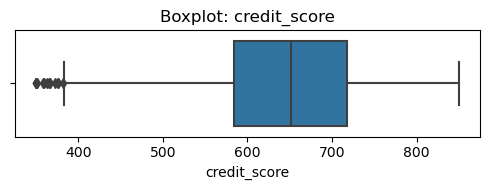

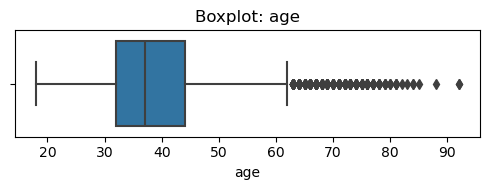

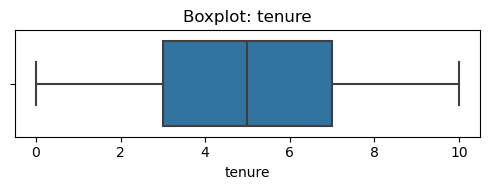

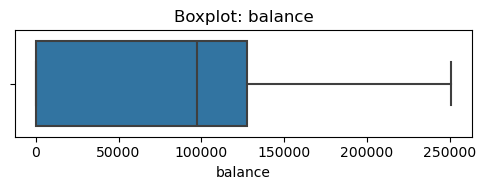

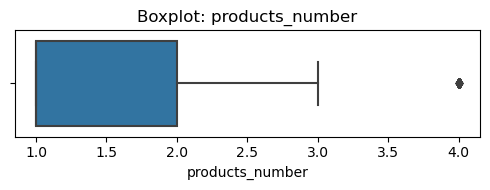

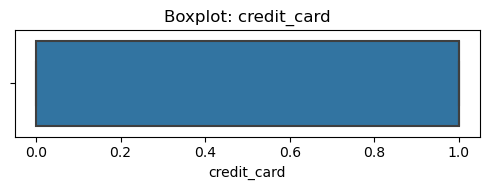

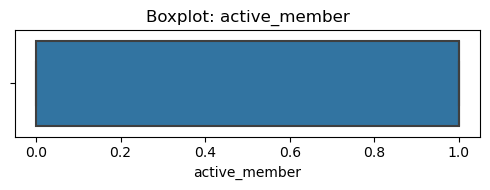

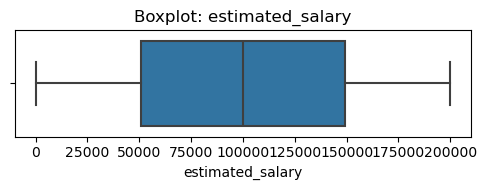

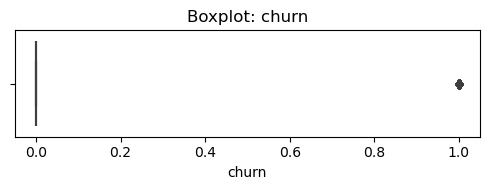

In [13]:
def dist_outliers(df, columns) :
    for i in columns :
        plt.figure(figsize = (5, 2))
        sns.boxplot(x = df2[i])
        plt.title(f"Boxplot: {i}")

        plt.tight_layout()
        plt.show()

dist_outliers(df2[numericals], numericals)

> Since all the outlier values are reasonable, it is unnecessary to perform any outlier handling.

### **Exploratory Data Analysis**  

**Bar Charts**  
- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***df2.value_counts().unstack()*** is used to count the unique values in a dataframe and stores it to a new dataframe. 
- ***percentage_table.plot(kind = "bar", stacked)*** is used to create a stacked bar chart. 
- ***plt.title()*** displays the plot's title.
- ***plt.xlabel()*** is used to set the label for the x-axis of a plot. 
- ***plt.ylabel()*** is used to set the label for the y-axis of a plot. 
- ***plt.xticks(rotation = 0)*** is used to display the x-axis label horizontally. 
- ***plt.xticks(rotation = 0)*** is used to display the x-axis label horizontally. 
- ***plt.ylim(0, 100)*** is used to set the limits of y-axis from 0 to 100. 
- ***plt.legend(title, labels, bbox_to_anchor, loc)*** is used to specify the legends in the plot. 
- ***plt.tight_layout()*** adjusts the subplots to ensure that the plots fits into the figure and avoid overlaps between plots.
- ***plt.show()*** displays the figures that was initialized before.

<Figure size 500x500 with 0 Axes>

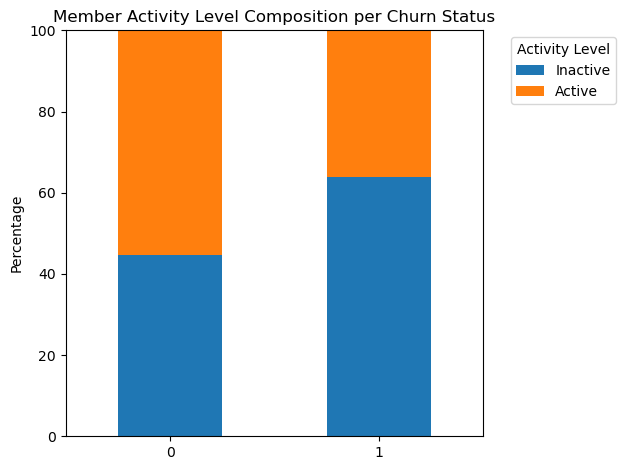

In [5]:
plt.figure(figsize=(5, 5))

vis_1 = df2.value_counts(["churn", "active_member"]).\
    unstack()
percentage_table_1 = vis_1.\
    div(vis_1.sum(axis = 1), 
        axis = 0) * 100
percentage_table_1.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Member Activity Level Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Activity Level", 
           labels = ["Inactive", "Active"],
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, we can conclude that inactive members are more likely to churn than the active ones.

<Figure size 500x500 with 0 Axes>

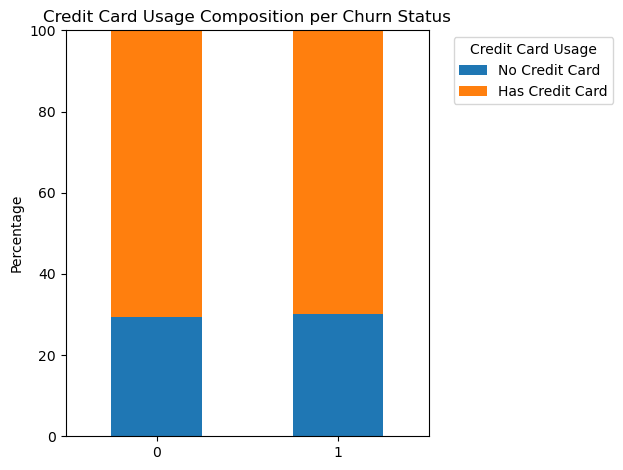

In [6]:
plt.figure(figsize=(5, 5))

vis_2 = df2.value_counts(["churn", "credit_card"]).\
    unstack()
percentage_table_2 = vis_2.\
    div(vis_2.sum(axis = 1), 
        axis = 0) * 100
percentage_table_2.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Credit Card Usage Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Credit Card Usage", 
           labels = ["No Credit Card", "Has Credit Card"],
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, we can conclude that credit card usage doesn't impact churn status, as the percentage are similar.

<Figure size 500x500 with 0 Axes>

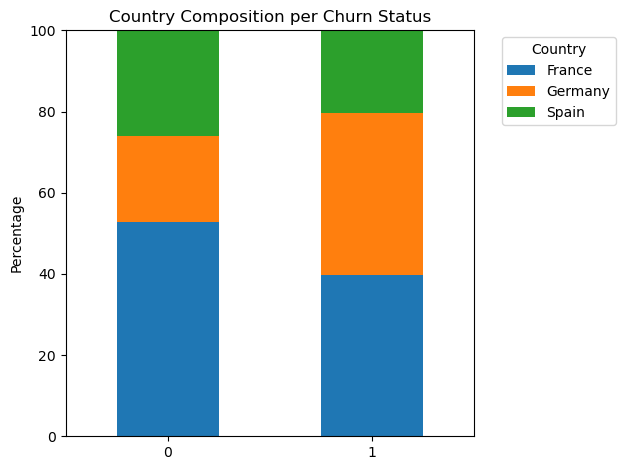

In [7]:
plt.figure(figsize=(5, 5))

vis_3 = df2.value_counts(["churn", "country"]).\
    unstack()
percentage_table_3 = vis_3.\
    div(vis_3.sum(axis = 1), 
        axis = 0) * 100
percentage_table_3.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Country Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Country", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, Germans have higher churn rates than those from Spain and France.

<Figure size 500x500 with 0 Axes>

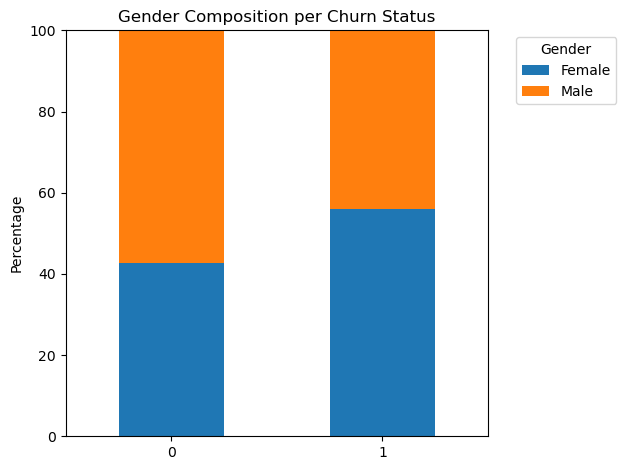

In [8]:
plt.figure(figsize=(5, 5))

vis_4 = df2.value_counts(["churn", "gender"]).\
    unstack()
percentage_table_4 = vis_4.\
    div(vis_4.sum(axis = 1), 
        axis = 0) * 100
percentage_table_4.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Gender Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Gender", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, we can conclude that females are more likely to churn than males.

<Figure size 500x500 with 0 Axes>

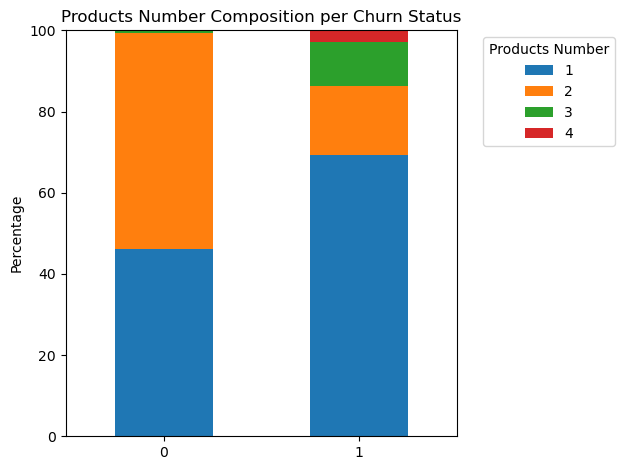

In [9]:
plt.figure(figsize=(5, 5))

vis_5 = df2.value_counts(["churn", "products_number"]).\
    unstack()
percentage_table_5 = vis_5.\
    div(vis_5.sum(axis = 1), 
        axis = 0) * 100
percentage_table_5.\
    plot(kind = "bar", 
         stacked = True)
plt.title("Products Number Composition per Churn Status")
plt.xlabel("")
plt.ylabel("Percentage")
plt.xticks(rotation = 0)
plt.ylim(0, 100)
plt.legend(title = "Products Number", 
           bbox_to_anchor=(1.05, 1), 
           loc = "upper left")

plt.tight_layout()
plt.show()

> Based on the chart above, customers with *products_number* 4 are all churning.

**Histogram**
- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***sns.histplot(x)*** creates a histogram that visualizes the distribution of a data.
- ***plt.title()*** displays the plot's title.
- ***plt.xlabel()*** is used to set the label for the x-axis of a plot. 
- ***plt.ylabel()*** is used to set the label for the y-axis of a plot. 
- ***plt.tight_layout()*** adjusts the subplots to ensure that the plots fits into the figure and avoid overlaps between plots.
- ***plt.show()*** displays the figures that was initialized before.

c:\Users\Marcelline\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


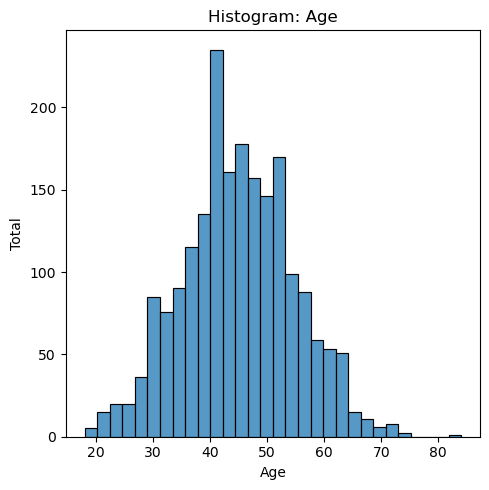

In [10]:
plt.figure(figsize=(5, 5))

sns.histplot(x = df2[df2['churn'] == 1]["age"], 
             bins = 30)
plt.title("Histogram: Age")
plt.xlabel("Age")
plt.ylabel("Total")

plt.tight_layout()
plt.show()

> Based on the chart above, the distribution of churning customers' age follows a normal distribution, with the peak around 40 years, indicating that this age group requires the most attention.

c:\Users\Marcelline\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


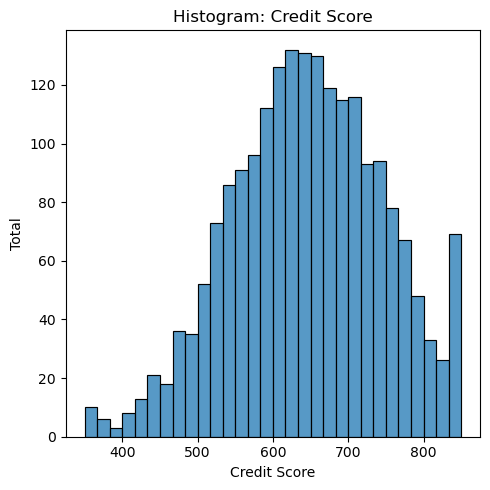

In [11]:
plt.figure(figsize=(5, 5))

sns.histplot(x = df2[df2['churn'] == 1]["credit_score"], 
             bins = 30)
plt.title("Histogram: Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Total")

plt.tight_layout()
plt.show()

> Notably, from the chart above, we can see that the distribution of churning customers' credit scores also follows a normal distribution, with the peak around 600, indicating that even high credit scores doesn't guarantee that a customer won't churn.

### **Feature Engineering**  
- ***df2.replace()*** is used to replace values based on a mapping provided.
- ***pd.DataFrame(one_hot.fit_transform(df2[["country"]]).toarray(), columns = one_hot.get_feature_names_out()).astype(int)*** is used to perform One-Hot encoding on a specific column of a dataframe.

In [12]:
binary_enc = {"gender": {"Male": 1, 
                         "Female": 0}}

df2 = df2.replace(binary_enc)

C:\Users\Marcelline\AppData\Local\Temp\ipykernel_21628\2427022810.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df2 = df2.replace(binary_enc)


In [13]:
one_hot = OneHotEncoder()
one_hot_enc = pd.DataFrame(one_hot.fit_transform(df2[["country"]]).toarray(), columns = one_hot.get_feature_names_out()).astype(int)
df2 = df2.reset_index()
df2 = pd.concat([df2, one_hot_enc], axis = 1)

### **Data Splitting**  
- ***df2.columns.drop()*** is used to remove specified columns from a dataframe.
- ***train_test_split(x, y, test_size, random_state)*** is used to split arrays into random train and test subtests.

In [14]:
x = df2[df2.columns.drop(["churn", "country"])]
y = df2["churn"]

x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y, 
                                                    test_size = 0.3, 
                                                    random_state = 7)

### **Data Normalization**
- ***numericals.remove()*** is used to remove a specified element from the numericals list.
- ***scale.fit()*** is used to prepare the scaler to transform data.
- ***scale.transform()*** is used to apply the scaling parameters prepared by the fit function and transform the data.

> In order to ensure that the prediction won't be biased towards any variable due to differences in their values, here I perform a robust normalization on the dataset.

In [15]:
numericals.remove("churn")
for i in numericals :
    scale = RobustScaler()
    scale.fit(x_train[[i]])
    x_train[i] = scale.transform(x_train[[i]])
    x_test[i] = scale.transform(x_test[[i]])

### **Modelling and Evaluation**

**Model 1: Logistic Regression**  
- ***LogisticRegression(solver = "liblinear", max_iter, random_state).fit()*** is used to initialize a logistic regression model using liblinear solver (suitable for small datasets) and fit the model to the train data.
- ***model_1.predict()*** is used to make predictions on the test data based on the model.
- ***classification_report()*** is used to generate a detailed report about the main classification metrics.
- ***confusion_matrix()*** is used to compute the confusion matrix.
- ***ConfusionMatrixDisplay()*** is used to display the confusion matrix visually.

      Predicted  Actual
0             0       1
1             1       0
2             0       0
3             0       0
4             0       0
...         ...     ...
2995          1       1
2996          0       0
2997          0       0
2998          0       0
2999          0       0

[3000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      2395
           1       0.55      0.20      0.29       605

    accuracy                           0.81      3000
   macro avg       0.69      0.58      0.59      3000
weighted avg       0.77      0.81      0.77      3000



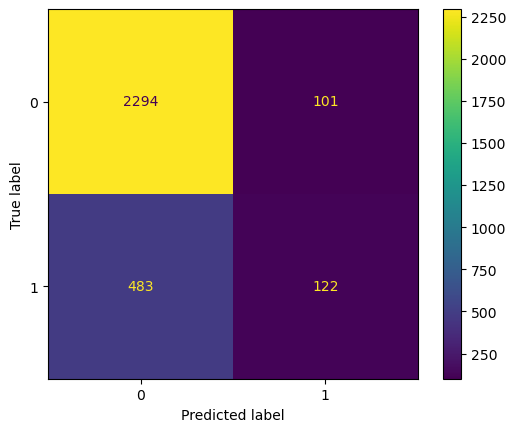

In [22]:
model_1 = LogisticRegression(solver = "liblinear", 
                             max_iter = 200, 
                             random_state = 0).\
                                fit(x_train, y_train)
y_pred_1 = model_1.\
    predict(x_test)

pred_df_1 = pd.DataFrame(y_pred_1, 
                         columns = ["Predicted"])
actual_df_1 = pd.DataFrame({"Actual": y_test.values})

comparison_1 = pd.concat([pred_df_1, actual_df_1], 
                         axis = 1)
print(comparison_1)

print(classification_report(y_test, y_pred_1))

cm_1 = confusion_matrix(y_test, y_pred_1, labels = [0,1])
cm_plot_1 = ConfusionMatrixDisplay(confusion_matrix = cm_1, display_labels = model_1.classes_)
cm_plot_1.plot()

> Based on the classification report above, the macro average precision score is 0.69, indicating that about 69% of the predicted positives are truly positive, which is not a bad result. However, if we look at the macro average recall score, which is 0.58, it indicates that out of all actual positives, the model can only predict 58% of them correctly.  
> As a result, the F1-Score is also low (0.59), indicating that the model is not performing well enough in predicting the results.  
> In addition to the conclusion above, when we look at the confusion matrix plot, it shows that while the model predicted most of the class 0 correctly, its performance for class 1 is very poor (the model only predicted 20% of the class 1 correctly).

**Model 2 : Support Vector Machine**  
- ***SVC(kernel = "rbf", C = 1.0).fit()*** is used to initialize a support vector classifier, using the Radial Basis Function (rbf) kernel and fit the model to the train data.  
- ***model_2.predict()*** is used to make predictions on the test data based on the model. 
- ***classification_report()*** is used to generate a detailed report about the main classification metrics.
- ***confusion_matrix()*** is used to compute the confusion matrix.
- ***ConfusionMatrixDisplay()*** is used to display the confusion matrix visually.

      Predicted  Actual
0             0       1
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
2995          0       1
2996          0       0
2997          0       0
2998          0       0
2999          0       0

[3000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2395
           1       0.00      0.00      0.00       605

    accuracy                           0.80      3000
   macro avg       0.40      0.50      0.44      3000
weighted avg       0.64      0.80      0.71      3000



c:\Users\Marcelline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Marcelline\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


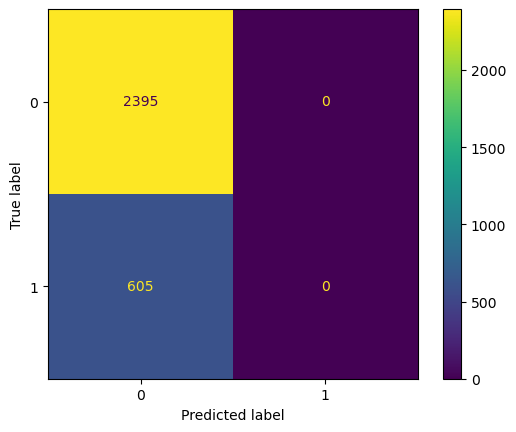

In [23]:
model_2 = SVC(probability = True, 
              kernel = "rbf", 
              C = 1.0).\
                fit(x_train, y_train)
y_pred_2 = model_2.\
    predict(x_test)

pred_df_2 = pd.DataFrame(y_pred_2, 
                         columns = ["Predicted"])
actual_df_2 = pd.DataFrame({"Actual": y_test.values})

comparison_2 = pd.concat([pred_df_2, actual_df_2], 
                         axis = 1)
print(comparison_2)

print(classification_report(y_test, y_pred_2))

cm_2 = confusion_matrix(y_test, y_pred_2, labels = [0,1])
cm_plot_2 = ConfusionMatrixDisplay(confusion_matrix = cm_2, display_labels = model_2.classes_)
cm_plot_2.plot()

> Based on the classification report above, the macro average precision score is 0.40, indicating that the model performs poorly at predicting the results, with more false positives than true positives. Additionally, the macro average recall score (0.50) suggests that out of all actual positives, the model can only predict 50% of them correctly, which sounds more like a gambling.   
> As a result, the F1-Score is also very low (0.44), highlighting the model's poor performance in predicting the results.  
> Furthermore, when we look at the confusion matrix plot, it reveals that the model consistently predicts class 0, which shows that the model's performance is not just bad, but terrible.

**Model 3 : Random Forest**  
- ***RandomForestClassifier(n_estimators, max_depth, min_samples_split, random_state).fit()*** is used to initialize a random forest classifier and fit the model to the train data.
- ***model_3.predict()*** is used to make predictions on the test data based on the model. 
- ***classification_report()*** is used to generate a detailed report about the main classification metrics.
- ***confusion_matrix()*** is used to compute the confusion matrix.
- ***ConfusionMatrixDisplay()*** is used to display the confusion matrix visually.

      Predicted  Actual
0             0       1
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
2995          1       1
2996          0       0
2997          0       0
2998          0       0
2999          0       0

[3000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.85      0.96      0.91      2395
           1       0.70      0.35      0.47       605

    accuracy                           0.84      3000
   macro avg       0.78      0.66      0.69      3000
weighted avg       0.82      0.84      0.82      3000



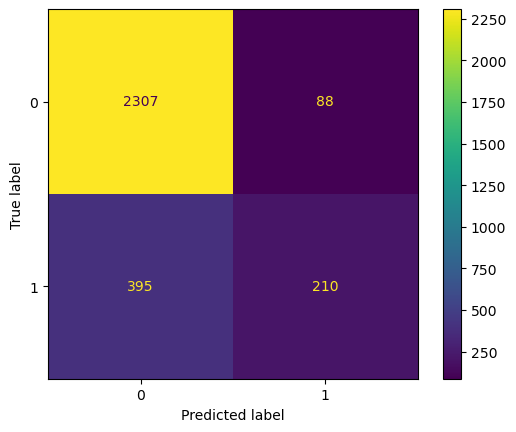

In [61]:
model_3 = RandomForestClassifier(n_estimators = 3, 
                                 max_depth = 3, 
                                 min_samples_split = 3,
                                 criterion = "gini",
                                 random_state = 7).\
                                    fit(x_train, y_train)
y_pred_3 = model_3.predict(x_test)

pred_df_3 = pd.DataFrame(y_pred_3, 
                         columns = ["Predicted"])
actual_df_3 = pd.DataFrame({"Actual": y_test.values})

comparison3 = pd.concat([pred_df_3, actual_df_3], 
                        axis = 1)
print(comparison3)

print(classification_report(y_test, y_pred_3))

cm_3 = confusion_matrix(y_test, y_pred_3, labels = [0,1])
cm_plot_3 = ConfusionMatrixDisplay(confusion_matrix = cm_3, display_labels = model_3.classes_)
cm_plot_3.plot()

> Based on the classification report above, the macro average precision score is 0.78, indicating a good model performance, as it correctly predicts 78% of the positives. Additionally, the macro average recall score (0.66), which is much better than the other 2 models, suggests that out of all actual positives, the model predicts 66% of them correctly.   
> As a result, the F1-Score is reasonably better (0.69), showing the model's overall performance in predicting the results.  
> Furthermore, when we look at the confusion matrix plot, the model predicts most of the class 0 correctly. Although the model also performs poorly in predicting class 1, it performs much better than the other two models, since the misclassification ratio is lower.

**ROC Curve**  
- ***model.predict_proba()[:, 1]*** is used to obtain the predicted probabilities for the positive class.
- ***roc_curve()*** is used to compute the false positive rate, true positive rate, and thresholds of a model.
- ***roc_auc_score()*** is used to compute the area under ROC curve, quantifying the performance of the model.
- ***plt.figure(figsize)*** creates a new figure for plotting.
- ***plt.plot(color, label)*** is used to plot the ROC curve and diagonal line based on the model.
- ***plt.title()*** displays the plot's title.
- ***plt.xlabel()*** is used to set the label for the x-axis of a plot. 
- ***plt.ylabel()*** is used to set the label for the y-axis of a plot. 
- ***plt.xlim([0.0, 1.0])*** is used to set the limits of x-axis from 0 to 1.
- ***plt.ylim([0.0, 1.0])*** is used to set the limits of y-axis from 0 to 1. 
- ***plt.legend(loc)*** is used to specify the legends in the plot. 
- ***plt.tight_layout()*** adjusts the subplots to ensure that the plots fits into the figure and avoid overlaps between plots.
- ***plt.show()*** displays the figures that was initialized before.

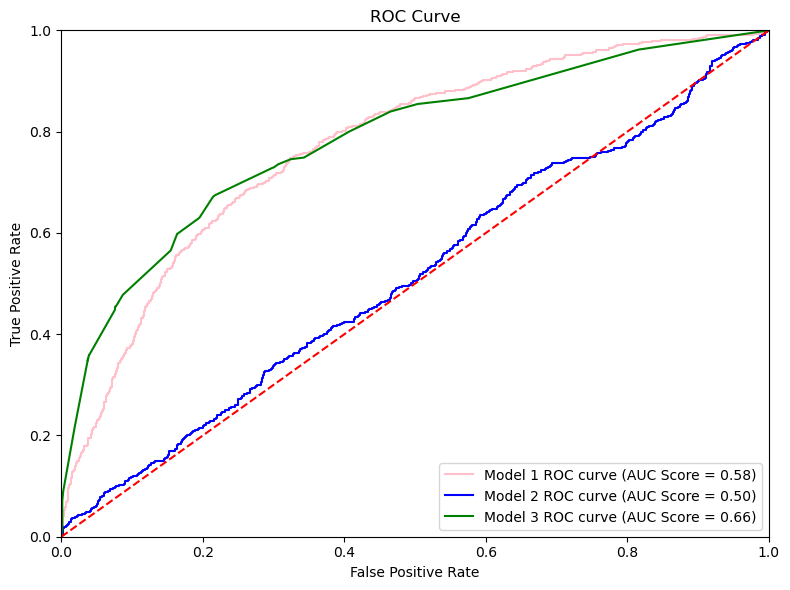

In [62]:
y_prob_1 = model_1.predict_proba(x_test)[:, 1]
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, 
                                       y_prob_1)
roc_auc_1 = roc_auc_score(y_test, 
                          y_pred_1)

y_prob_2 = model_2.predict_proba(x_test)[:, 1]
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, 
                                       y_prob_2)
roc_auc_2 = roc_auc_score(y_test, 
                          y_pred_2)

y_prob_3 = model_3.predict_proba(x_test)[:, 1]
fpr_3, tpr_3, thresholds_3 = roc_curve(y_test, 
                                       y_prob_3)
roc_auc_3 = roc_auc_score(y_test,
                          y_pred_3)

plt.figure(figsize=(8, 6))

plt.plot(fpr_1, 
         tpr_1, 
         color = "pink", 
         label = f"Model 1 ROC curve (AUC Score = {roc_auc_1:.2f})")
plt.plot(fpr_2, 
         tpr_2, 
         color = "blue", 
         label = f"Model 2 ROC curve (AUC Score = {roc_auc_2:.2f})")
plt.plot(fpr_3, 
         tpr_3, 
         color = "green", 
         label = f"Model 3 ROC curve (AUC Score = {roc_auc_3:.2f})")
plt.plot([0, 1], 
         [0, 1], 
         color = "red", 
         linestyle = "--")
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.legend(loc = "lower right")

plt.tight_layout()
plt.show()

> Based on the ROC curve above, along with the results of evaluating the model with classification report, we can conclude that model 3 (random forest) performs the best.

### **Import Fine-Tuning Library**  
- ***sklearn.model_selection.GridSearchCV*** is used to perform GridSearchCV fine tuning on model.

In [57]:
from sklearn.model_selection import GridSearchCV

### **Set Hyperparameters**  

In [58]:
hyparameters = {
    "n_estimators" : [10, 25, 50, 100],
    "max_depth" : [2, 5, 10, 20, 50],
    "min_samples_split" : [3, 7, 15, 25],
    "criterion" : ["gini", "entropy"]
}

### **Perform Fine-Tuning**
- ***GridSearchCV()*** is used to perform fine-tuning on the model.
- ***grid_search.fit()*** is used to train the model on the train data.

In [59]:
grid_search = GridSearchCV(estimator = model_3, 
                           param_grid = hyparameters,
                           scoring = "roc_auc", 
                           cv = 7, 
                           n_jobs = -1, 
                           verbose = 2)

grid_search.fit(x_train, y_train)

print("Best parameter : ", grid_search.best_params_)
print("Best score : ", grid_search.best_score_)

Fitting 7 folds for each of 160 candidates, totalling 1120 fits


c:\Users\Marcelline\anaconda3\Lib\site-packages\numpy\ma\core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameter :  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 25, 'n_estimators': 100}
Best score :  0.85449882624252


> Based on the fine-tuning result above, it is known that the best parameters to be used inside the models are entropy (*criterion*), 10 (*max_depth*), 25 (*min_samples_split*), and 100 (*n_estimators*).

### **Test Fine-Tuned Model**
- ***RandomForestClassifier(n_estimators, max_depth, min_samples_split, random_state).fit()*** is used to initialize a random forest classifier and fit the model to the train data.
- ***model.predict()*** is used to make predictions on the test data based on the model. 
- ***classification_report()*** is used to generate a detailed report about the main classification metrics.
- ***confusion_matrix()*** is used to compute the confusion matrix.
- ***ConfusionMatrixDisplay()*** is used to display the confusion matrix visually.

      Predicted  Actual
0             1       1
1             0       0
2             0       0
3             0       0
4             0       0
...         ...     ...
2995          1       1
2996          0       0
2997          0       0
2998          0       0
2999          0       0

[3000 rows x 2 columns]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2395
           1       0.80      0.40      0.54       605

    accuracy                           0.86      3000
   macro avg       0.83      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



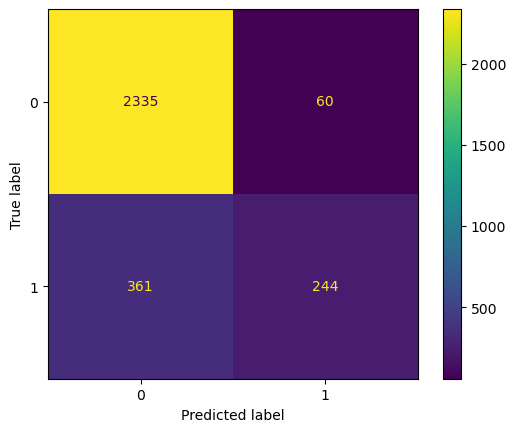

In [60]:
model = RandomForestClassifier(n_estimators = 100, 
                               max_depth = 10, 
                               min_samples_split = 25,
                               criterion = "entropy",
                               random_state = 7).\
                                fit(x_train, y_train)
y_preds = model.predict(x_test)

pred_df = pd.DataFrame(y_preds, 
                       columns = ["Predicted"])
actual_df = pd.DataFrame({"Actual": y_test.values})

comparison = pd.concat([pred_df, actual_df], 
                        axis = 1)
print(comparison)

print(classification_report(y_test, y_preds))

cm = confusion_matrix(y_test, y_preds, labels = [0,1])
cm_plot = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
cm_plot.plot()

> Based on the result, it is confirmed that the model performs better with the fine-tuned hyperparameters, as the precision, recall, F1 scores, and correct classification ratio are all higher.